On montre comment utiliser la méthode de Zouteindijk pour résoudre le programme non linéaire suivant

\begin{equation*}
\begin{array}{l}
\text{Minimiser }   3x_1^2+2x_1x_2+2x_2^2-6x_1-9x_2\\[1mm]
-3x_1+6x_2\leqslant 9   \\
-2x_1+\phantom{6}x_2\leqslant 1   \\
x_1,x_2\geqslant 0.
\end{array}
\end{equation*}

In [1]:
using Plots, JuMP, Optim, GLPK, Ipopt, MathOptInterface

On commence par résoudre le problème graphiquement. 

On dessine les contours de la fonction $f$ ainsi que l'ensemble des points admissibles. Ça nous permet d'avoir une idée sur  l'existence et l'estimation de la solution.

In [115]:
function f(x)
	return 3x[1]^3+2x[1]*x[2]+2x[2]^3-6x[1]-9x[2]
end
	
function df(x)
	return [9x[1]^2+2x[2]-6, 6x[2]^2+2x[1]-9]
end
	
function g1(x,y)
	return -3x+6y
end
	
function g2(x,y)
	return -2x+y
end

g2 (generic function with 1 method)

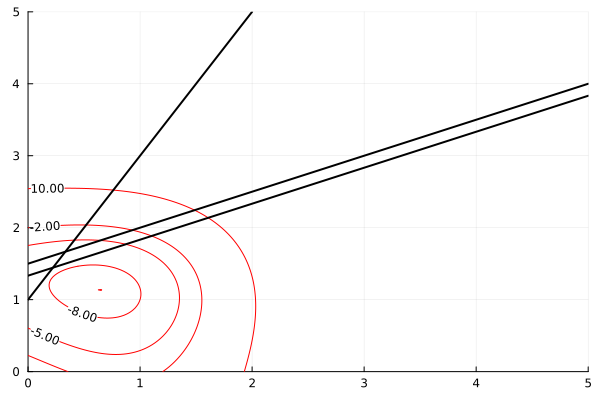

In [109]:
nx = 200
ny = 199
x = range(0,5, length=nx)
y = range(0,5, length=ny)
ff = zeros(nx, ny)

for i in 1:nx
    for j in 1:ny
        ff[i,j] = f([x[i], y[j]])
    end
end


contour(x, y, ff', levels = [-8.89, -8, -2, -5, 10], color="red", colorbar = false, contour_labels=true)
contour!(x,y,g1, levels=[8,9], color="black", linewidth=2 )
contour!(x,y, g2, levels=[1], color="black", linewidth=2)

In [6]:
savefig("dessin.pdf")

Résolution du problème en utilisant le module `JuMP` avec le solveur `Ipopt`.

In [107]:
modele = Model(Ipopt.Optimizer)
set_silent(modele)

# définition des variables
@variable(modele, x[1:2] >= 0)

# définition de la fonction objectif
@NLobjective(modele, Min, 3x[1]^3+2x[1]*x[2]+2x[2]^3-6x[1]-9x[2])

# définition des contraintes
@constraint(modele, -3x[1]+6x[2] <= 9)
@constraint(modele, -2x[1]+x[2] <= 1)

# résolution du problème
optimize!(modele);

#affichage de la valeur optimale
@show objective_value(modele)

#affichage de la solution
println("solution = $(value.(x))")

objective_value(modele) = -8.891590353138216
solution = [0.6439933762925375, 1.1337263958445973]


In [119]:
linearModel = Model(GLPK.Optimizer)
@variable(linearModel, -1 .<= d[1:2] .<= 1)
set_objective_sense(linearModel, MathOptInterface.MIN_SENSE)
ρ = 10^-2

0.010000000000000002

In [120]:
x0 = [0.0,0]
A = [-3 6; -2 1; -1 0; 0 -1]
b = [9, 1, 0, 0];
liste_iteres = [x0]

1-element Vector{Vector{Float64}}:
 [0.0, 0.0]

In [137]:
ind = findall(abs.(A*x0-b) .<= ρ)
println("ind = $ind")
A1 = A[ind, :]
b1 = b[ind]
A2 = A[setdiff(1:4, ind),:]
b2 = b[setdiff(1:4,ind)];

ind = Int64[]


In [138]:
set_objective_function(linearModel, df(x0)'*d)
@constraint(linearModel, cons, A1*d .<= b1)
optimize!(linearModel)
println(linearModel)

Min -0.19206513902504607 d[1] - 0.19206510828062306 d[2]
Subject to
 d[1] ≥ -1.0
 d[2] ≥ -1.0
 d[1] ≤ 1.0
 d[2] ≤ 1.0



In [139]:
hd = A2*value.(d)
hb = (b2-A2*x0)[hd .> 0]
hd = hd[hd .> 0]
α_max = hb != [] ? minimum(hb ./ hd) : 100

1.3859317795489299

In [140]:
# recherche linéaire
ϕ(t) = f(x0+t*value.(d))
res = Optim.optimize(ϕ, 0, α_max, GoldenSection())
α = Optim.minimizer(res)

0.013251729938655586

In [141]:
x0 = x0+α*value.(d) 
println(df(x0)'*value.(d))
append!(liste_iteres, [x0])

-1.7225872994686142e-7


4-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [0.8755164045926372, 0.8755164045926372]
 [0.6293324659731597, 1.1217003432121149]
 [0.6425841959118153, 1.1349520731507705]

In [142]:
unregister(linearModel,:cons)
delete(linearModel, cons)

In [143]:
x0

2-element Vector{Float64}:
 0.6425841959118153
 1.1349520731507705

In [144]:
f(x0)

-8.891572083673365

In [33]:
df(x0)

2-element Vector{Float64}:
 -6.245117845082859e-8
  0.33333303290082306

In [55]:
liste_iteres

4-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [1.0714285589491293, 1.0714285589491293]
 [0.4285714238328525, 1.7142856940654059]
 [0.428571459534889, 1.7142857297674423]

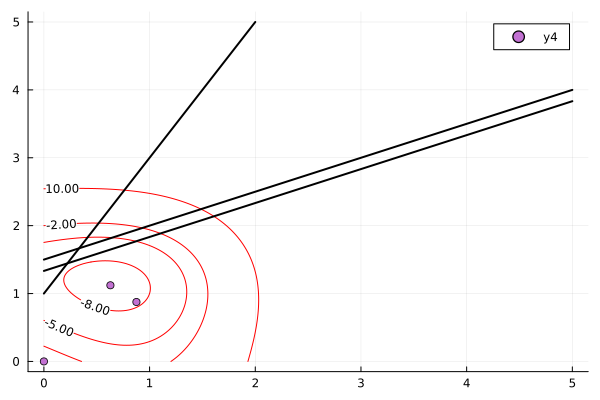

In [145]:
scatter!([liste_iteres[i][1] for i in 1:3], [liste_iteres[i][2] for i in 1:3])

In [ ]:
function zouteindijk_linear(f, df, A, b, Q, c, x0, ϵ, maxiter)
   
    ρ = 0.01
    i = 1
    while i< itermax
       
        
        
        if abs(df(x0)'*d)<ϵ 
            return x0, f(x0)
        end
        
    end
    
end